# Analysis and Visualization
This notebook is focused on the model in action and answers the question you posed or address the problem we are investigating. Includes plots and visualizations as necessary to address the question and/or research topic.

### Sandy Tam -- CNN Analysis and Visualization

In [1]:
import json
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import os
import numpy as np

# Set device
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print("Using device:", device)

Using device: cpu


In [2]:
class CatBreedCNN(nn.Module):
    def __init__(self, num_classes=66, kernel_size=3):
        super(CatBreedCNN, self).__init__()
        
        padding = kernel_size // 2
        
        # Block 1
        self.conv1 = nn.Conv2d(3, 64, kernel_size, padding=padding)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, kernel_size, padding=padding)
        self.bn2 = nn.BatchNorm2d(64)
        
        # Block 2
        self.conv3 = nn.Conv2d(64, 128, kernel_size, padding=padding)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, kernel_size, padding=padding)
        self.bn4 = nn.BatchNorm2d(128)
        
        # Block 3
        self.conv5 = nn.Conv2d(128, 256, kernel_size, padding=padding)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 256, kernel_size, padding=padding)
        self.bn6 = nn.BatchNorm2d(256)
        
        # Block 4
        self.conv7 = nn.Conv2d(256, 512, kernel_size, padding=padding)
        self.bn7 = nn.BatchNorm2d(512)
        self.conv8 = nn.Conv2d(512, 512, kernel_size, padding=padding)
        self.bn8 = nn.BatchNorm2d(512)
        
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
        self.conv_dropout = nn.Dropout2d(0.2) 
        self.dropout1 = nn.Dropout(0.5)        
        self.dropout2 = nn.Dropout(0.5)        
        self.dropout3 = nn.Dropout(0.4)        
        
        # Adaptive pooling to handle any input size
        self.adaptive_pool = nn.AdaptiveAvgPool2d((7, 7))
        
        # Fully connected layers
        self.fc1 = nn.Linear(512 * 7 * 7, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, num_classes)

    def forward(self, x):
        # Block 1
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = self.conv_dropout(x)
        
        # Block 2
        x = self.relu(self.bn3(self.conv3(x)))
        x = self.relu(self.bn4(self.conv4(x)))
        x = self.pool(x)
        x = self.conv_dropout(x)
        
        # Block 3
        x = self.relu(self.bn5(self.conv5(x)))
        x = self.relu(self.bn6(self.conv6(x)))
        x = self.pool(x)
        x = self.conv_dropout(x)
        
        # Block 4
        x = self.relu(self.bn7(self.conv7(x)))
        x = self.relu(self.bn8(self.conv8(x)))
        x = self.pool(x)
        x = self.conv_dropout(x)
        
        # Adaptive pooling
        x = self.adaptive_pool(x)
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # FC layers
        x = self.dropout1(x)
        x = self.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.relu(self.fc2(x))
        x = self.dropout3(x)
        x = self.fc3(x)
        
        return x

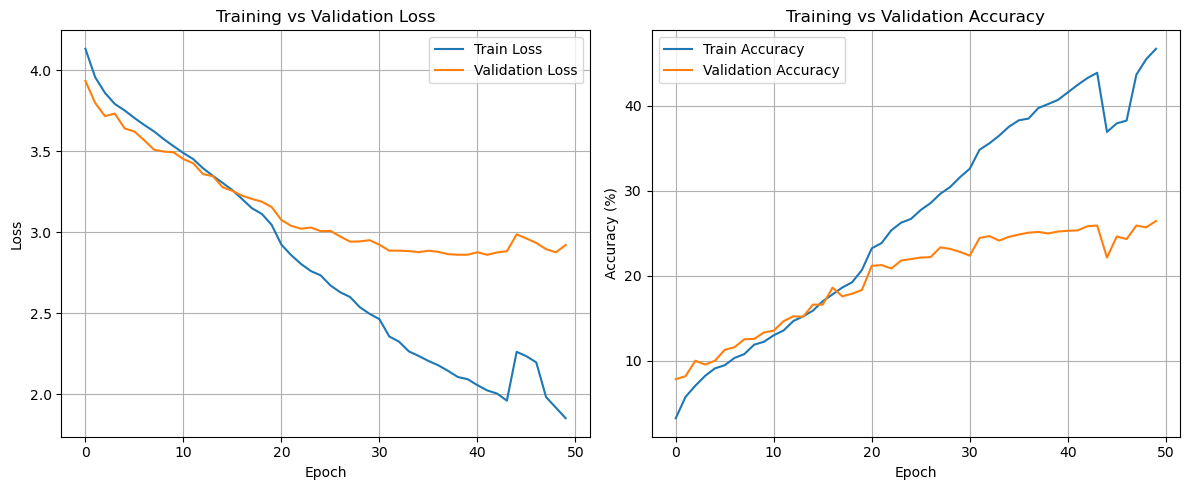

Best Validation Accuracy: 26.45%


In [3]:
# Load training history
history_path = os.path.join('CNN', 'training_history.json')

if os.path.exists(history_path):
    with open(history_path, 'r') as f:
        history = json.load(f)
    
    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Best Validation Accuracy: {max(history['val_acc']):.2f}%")
else:
    print(f"File not found: {history_path}")

In [4]:
# Load Model
model_path = os.path.join('CNN', 'cat_breed_cnn.pth')
KERNEL_SIZE = 5 # Assuming kernel size 5 from training

if os.path.exists(model_path):
    model = CatBreedCNN(kernel_size=KERNEL_SIZE)
    try:
        model.load_state_dict(torch.load(model_path, map_location=device))
        model.to(device)
        model.eval()
        print("Model loaded successfully!")
        print(model)
    except Exception as e:
        print(f"Error loading model: {e}")
else:
    print(f"Model file not found: {model_path}")

C:\Users\hurri\AppData\Local\Temp\ipykernel_20988\56176826.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=devi

Model loaded successfully!
CatBreedCNN(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(256, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn6): BatchNorm2d(256, eps=1e-05, momentu

In [5]:
# Evaluate on Test Data
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transforms (must match training)
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  
        std=[0.229, 0.224, 0.225]
    )
])

# Load Test Data
TEST_DIR = os.path.join('CNN', 'data', 'test')
test_dataset = datasets.ImageFolder(root=TEST_DIR, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

class_names = test_dataset.classes
print(f"Classes: {len(class_names)}")

# Get Predictions
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Classification Report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Classes: 66


KeyboardInterrupt: 

### Christina Vo -- Logistic Regression Analysis and Visualization

In [ ]:
# import libraries

### Conclusion and Results

share our findings and what we conclude as a team